<a href="https://colab.research.google.com/github/Ejay123-tech/lesson3/blob/main/lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explaratory Data Analysis**
EDA is used to:
* Analyze
* Investigate datasets
* Sumarize their main Characteristics

It makes it easier for data scientist to discover patterns, spot anomalies, test hypothsis and check assumptions.

To go through this, we shall buid a simple model to predict customers survival rate on the titanic using the available features.

## **Data Aquisation**

In [40]:
# Getting the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Loading the dataset
titanic =pd.read_csv(r"/content/titanic dataset.csv")

In [23]:
# Prforming initial exploration
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [25]:
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [26]:
# Checking for missing values
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


### **Observation**
* There are mising values in age and in cabin
* We have both categorical ad numerical features
* The survived column is our targert variable

## **Data Cleaning and feature Engeneering**


In [27]:
# Handling missing values by filling the age with the median
titanic["Age"].fillna(titanic["Age"].median(),inplace = True)


<ipython-input-27-77b2ceb5046f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(),inplace = True)


In [34]:
# Dropping unnecessary columns
titanic.drop(["Cabin","Ticket","Name","PassengerId","Embarked"],axis =1,inplace = True)

In [35]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875


In [37]:
# Converting sex to a numerical variable
titanic["Sex"]=titanic["Sex"].map({"male":1,"female":0})

In [38]:
# Verify there are no missing null values
print(titanic.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
dtype: int64


### **Data Visualisation**


<Axes: xlabel='Survived', ylabel='count'>

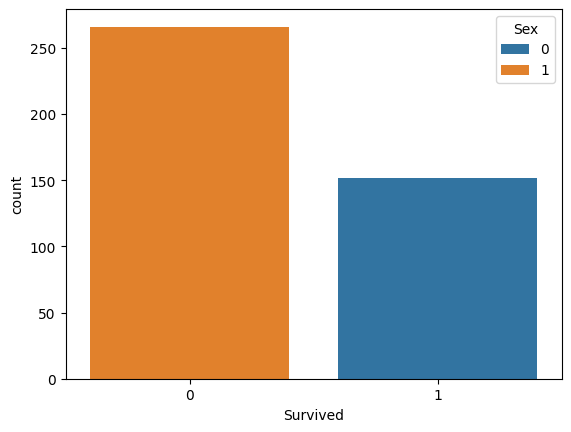

In [46]:
# Survival by gender
sns.countplot(x="Survived",hue="Sex", data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

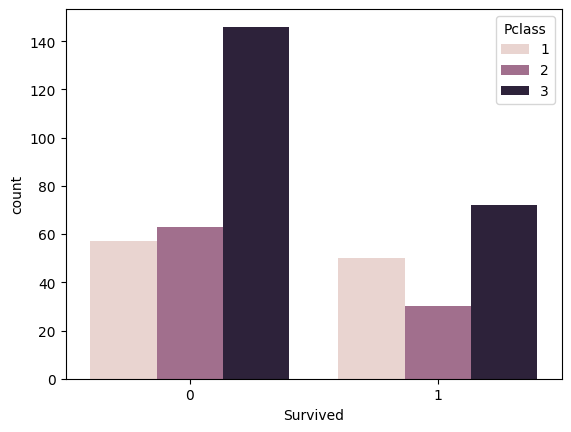

In [48]:
# Survival rate by class
sns.countplot(x="Survived",hue="Pclass", data=titanic)

<Axes: xlabel='Age', ylabel='Count'>

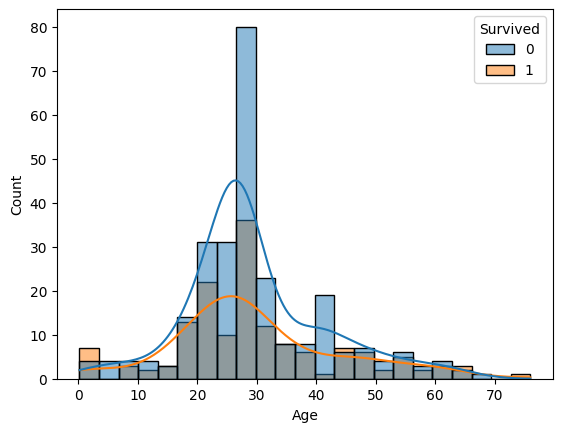

In [50]:
# Age distribution by survival
sns.histplot(titanic,x="Age",hue= "Survived",kde = True )

In [53]:
# Corelation matrix
correlation_matrix = titanic.corr()
print(correlation_matrix)

          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.108615 -1.000000  0.008035  0.099943  0.159120  0.191514
Pclass   -0.108615  1.000000  0.108615 -0.467853  0.001087  0.018721 -0.577147
Sex      -1.000000  0.108615  1.000000 -0.008035 -0.099943 -0.159120 -0.191514
Age       0.008035 -0.467853 -0.008035  1.000000 -0.071197 -0.043731  0.347105
SibSp     0.099943  0.001087 -0.099943 -0.071197  1.000000  0.306895  0.171539
Parch     0.159120  0.018721 -0.159120 -0.043731  0.306895  1.000000  0.230046
Fare      0.191514 -0.577147 -0.191514  0.347105  0.171539  0.230046  1.000000


<Axes: >

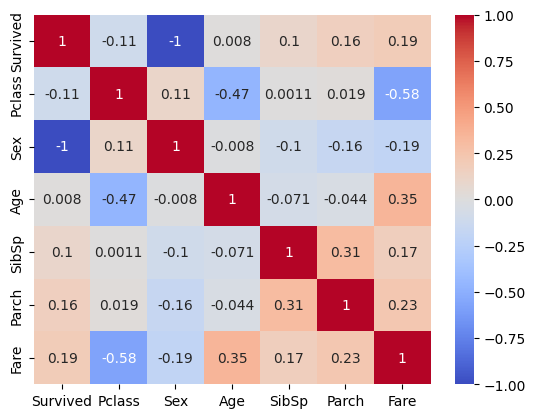

In [54]:
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

### **Observations from EDA**
* Females had a significantly higher survival rate than males.
* Passengers in higher classes (Pclass 1 and 2) had a higher survival rate.
* Younger passengers had a slightly higher chance of survival.
* Age and Pclass are negatively correlated.
* Sex has the highest correlation with survival.

## **Building Simple logistic model**


In [55]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
# Split the data into features X and target y
X=titanic.drop("Survived",axis =1)
y=titanic["Survived"]

In [61]:
# Split thee data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
# Creating the train model
model=LogisticRegression(solver="liblinear")

In [77]:
X_train.isnull().sum()
X_train.dropna(inplace=True)
y_train

In [79]:
# Drop one value from y_test (e.g., the first value)
y_test = y_test.drop(y_test.index[0])


In [80]:
model.fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [333, 334]